<a href="https://colab.research.google.com/github/Suraj6769/Matchine_learning/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/h16vq9rab1itifs/CatDog.zip
! unzip CatDog.zip
! rm CatDog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import shutil
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.io import imread, imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir= "/content/training_set/training_set"
d ={"dogs":0,"cats":0}
for dir in os.listdir(train_dir):
  path = os.path.join(train_dir,dir)
  d[dir]=len(os.listdir(path))

print(d)

{'dogs': 4006, 'cats': 4001}


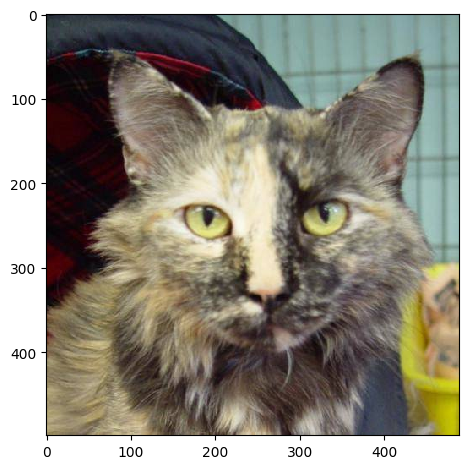

In [ ]:
imshow("/content/training_set/training_set/cats/cat.10.jpg")

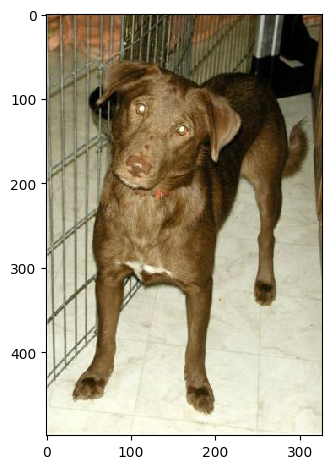

In [ ]:
imshow("/content/training_set/training_set/dogs/dog.1.jpg")

In [ ]:
dir_name=['train','test','val']
ROOT_DIR ='./data_dir'
if not os.path.exists(ROOT_DIR):
  for d in dir_name:
    os.makedirs(os.path.join(ROOT_DIR,d))

for dir in os.listdir(train_dir):
  de = os.path.join(ROOT_DIR,'train',dir)
  os.mkdir(de)

  for img in np.random.choice(os.listdir(os.path.join(train_dir,dir)),int(len(os.listdir(os.path.join(train_dir,dir)))*.8),replace=False):
    org = os.path.join(train_dir,dir,img)
    dest = os.path.join(de,img)
    shutil.copy(org,dest)
    os.remove(org)


In [ ]:
for dir in os.listdir(train_dir):
  de = os.path.join(ROOT_DIR,'val',dir)
  os.mkdir(de)

  for img in np.random.choice(os.listdir(os.path.join(train_dir,dir)),int(len(os.listdir(os.path.join(train_dir,dir)))*.5),replace=False):
    org = os.path.join(train_dir,dir,img)
    dest = os.path.join(de,img)
    shutil.copy(org,dest)
    os.remove(org)

In [ ]:
for dir in os.listdir(train_dir):
  de = os.path.join(ROOT_DIR,'test',dir)
  os.mkdir(de)

  for img in np.random.choice(os.listdir(os.path.join(train_dir,dir)),int(len(os.listdir(os.path.join(train_dir,dir)))),replace=False):
    org = os.path.join(train_dir,dir,img)
    dest = os.path.join(de,img)
    shutil.copy(org,dest)
    os.remove(org)

In [ ]:
traindatagenerator=ImageDataGenerator(rescale=1/255,rotation_range=0.3,zoom_range=0.3,horizontal_flip=True,vertical_flip=True)
train_data=traindatagenerator.flow_from_directory(directory="/content/data_dir/train",target_size=(224,224),class_mode="binary")

Found 6402 images belonging to 2 classes.


In [ ]:
testdatagenerator=ImageDataGenerator(rescale=1/255)
test_data=testdatagenerator.flow_from_directory(directory="/content/data_dir/test",target_size=(224,224),class_mode="binary")

Found 802 images belonging to 2 classes.


In [ ]:
valdatagenerator=ImageDataGenerator(rescale=1/255)
val_data=valdatagenerator.flow_from_directory(directory="/content/data_dir/val",target_size=(224,224),class_mode="binary")

Found 801 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
CLASS_ID = {j:i for i,j in train_data.class_indices.items()}

In [ ]:
CLASS_ID

{0: 'cats', 1: 'dogs'}

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      4624      
                                                                 
 conv2d_4 (Conv2D)           (None, 104, 104, 64)      9280      
                                                        

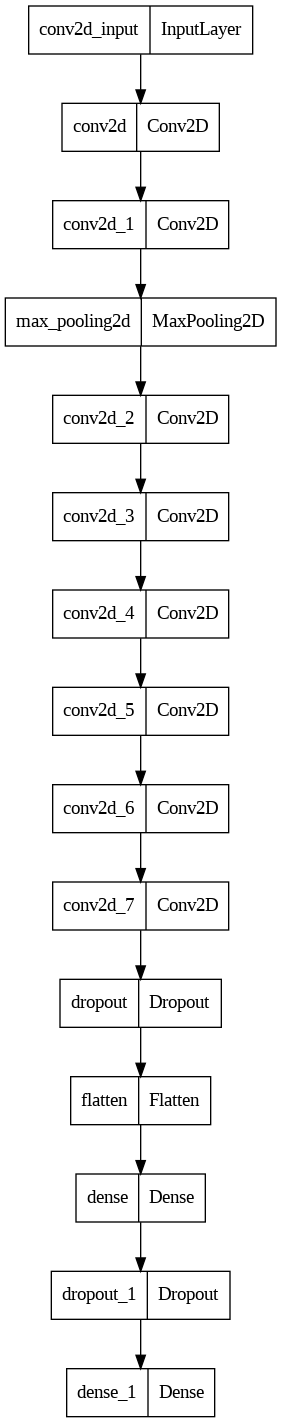

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=7,verbose=1,mode='auto')
mc = ModelCheckpoint(filepath='best_model.h5',monitor='val_accuracy',verbose=1,
                     save_best_only=True,
                     mode='auto')
callback=[es,mc]

In [ ]:
hist = model.fit_generator(generator=train_data,
                            validation_data=val_data,
                            validation_steps=16,
                            steps_per_epoch=32,
                            epochs=30,
                            verbose=1,
                            callbacks=callback)


<ipython-input-19-53fc6246dca5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_data,


Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 0.7071 - accuracy: 0.4824
Epoch 1: val_accuracy improved from -inf to 0.47070, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 29s 470ms/step - loss: 0.7071 - accuracy: 0.4824 - val_loss: 0.6933 - val_accuracy: 0.4707
Epoch 2/30
32/32 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5059
Epoch 2: val_accuracy improved from 0.47070 to 0.51562, saving model to best_model.h5
32/32 [==============================] - 17s 543ms/step - loss: 0.6932 - accuracy: 0.5059 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 3/30
32/32 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.51562
32/32 [==============================] - 19s 580ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4785
Epoch 4/30
32/32 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4883
Epoch 4: val_accuracy did not improve from 0.51562
32/32 [==============================] - 17s 519ms/step - loss: 0.6932 - accuracy: 0.4883 - val_loss: 0.6932 - val_accuracy: 0.4668
Ep

In [ ]:
from tensorflow.keras.models import load_model
final_model = load_model("best_model.h5")

In [ ]:
from typing import Generator
final_model.evaluate_generator(generator=test_data)

<ipython-input-21-a8196f1c0021>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  final_model.evaluate_generator(generator=test_data)


[0.6931496858596802, 0.5]

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
vgg.get_config()

{'name': 'vgg16',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'block1_conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regu

In [ ]:
for layer in vgg.layers[:15]:
  layer.trainable = False
for layer in vgg.layers[15:]:
  layer.trainable = True

In [ ]:
final_layer = vgg.layers[-1]

In [ ]:
final_layer.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
x = Flatten()(final_layer.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1, activation='sigmoid')(x)

In [ ]:
transfer_model = tf.keras.models.Model(inputs=vgg.input, outputs=x)

In [ ]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

There are 19925505 number of parameter which is too much so we reduce the number of parameter by applying GlobalMax2D layer

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling2D

In [ ]:
x = GlobalMaxPooling2D()(final_layer.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1, activation='sigmoid')(x)

transfer_model = tf.keras.models.Model(inputs=vgg.input, outputs=x)
transfer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
transfer_model.compile(loss='binary_crossentropy',
                       optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
                       metrics=['accuracy'])

In [ ]:
hist = transfer_model.fit_generator(generator=train_data,
                            validation_data=val_data,
                            validation_steps=16,
                            steps_per_epoch=128,
                            epochs=10,
                            verbose=1,
                            callbacks=callback)


<ipython-input-33-7eac5b93f17f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = transfer_model.fit_generator(generator=train_data,


Epoch 1/10
128/128 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.5883
Epoch 1: val_accuracy improved from 0.52148 to 0.77539, saving model to best_model.h5
128/128 [==============================] - 69s 474ms/step - loss: 0.6961 - accuracy: 0.5883 - val_loss: 0.5366 - val_accuracy: 0.7754
Epoch 2/10
128/128 [==============================] - ETA: 0s - loss: 0.5556 - accuracy: 0.7109
Epoch 2: val_accuracy improved from 0.77539 to 0.81250, saving model to best_model.h5
128/128 [==============================] - 60s 472ms/step - loss: 0.5556 - accuracy: 0.7109 - val_loss: 0.4192 - val_accuracy: 0.8125
Epoch 3/10
128/128 [==============================] - ETA: 0s - loss: 0.4582 - accuracy: 0.7854
Epoch 3: val_accuracy improved from 0.81250 to 0.88086, saving model to best_model.h5
128/128 [==============================] - 61s 475ms/step - loss: 0.4582 - accuracy: 0.7854 - val_loss: 0.3073 - val_accuracy: 0.8809
Epoch 4/10
128/128 [==============================] 

In [ ]:
best_model = load_model("best_model.h5")
best_model.evaluate_generator(generator=test_data)

<ipython-input-34-87aec3c09cee>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  best_model.evaluate_generator(generator=test_data)


[0.1826590597629547, 0.9351620674133301]